## Multi-label classification

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.conv_learner import *

In [3]:
display(torch.cuda.is_available())
display(torch.backends.cudnn.enabled)

False

True

In [4]:
PATH = f'/home/{os.environ["USER"]}/data/loc-newspaper/'
# images_root = f'{data_root}images/'


In [5]:
ls {PATH}

images/           img_mdata.csv      img_metadata.json.bak  tmp/
images-modified/  img_metadata.json  labels.csv


In [6]:
from fastai.plots import plots_from_files

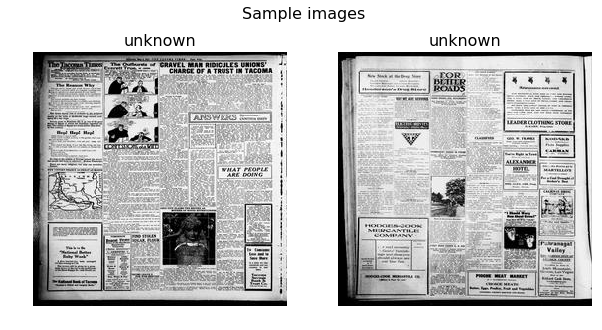

In [8]:
list_paths = [f'{PATH}images-modified/0016af005540341d896923265a80c3b6.jpg', f'{PATH}images-modified/002d4d8d6a00aea0eb5c0db25feef011.jpg']
titles=["unknown", "unknown"]
plots_from_files(list_paths, titles=titles, maintitle="Sample images")

In [9]:
label_csv = f'{PATH}labels.csv'

In [10]:
import pandas as pd
pd.read_csv(label_csv).head()

,id,labels
0,0016af005540341d896923265a80c3b6,map
1,002d4d8d6a00aea0eb5c0db25feef011,photograph
2,00315cd56b0932d1a2511a5a5c408b79,illustration
3,004c143ad20bc6ec664eb9368b763e20,photograph illustration
4,006aed5b166ab85682ccdd7c86f80bd0,photograph


In [11]:
n = len(list(open(label_csv))) - 1
val_idxs = get_cv_idxs(n)

In [12]:
def get_data(sz, bs=64):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.05)
    return ImageClassifierData.from_csv(
        PATH,
        'images-modified',
        label_csv,
        bs=bs,
        tfms=tfms,
        suffix='.jpg',
        val_idxs=val_idxs
    )

In [13]:
arch = resnet34

In [14]:
data = get_data(256)

In [15]:
x, y = next(iter(data.val_dl))

In [18]:
y[:10]


    1     0     0     0     0     0
    0     0     0     0     0     1
    0     0     1     0     0     1
    0     0     1     0     0     1
    0     0     0     0     0     1
    1     0     0     0     0     0
    0     0     0     0     0     1
    0     0     1     0     0     0
    0     0     0     0     0     1
    0     0     1     0     0     0
[torch.FloatTensor of size 10x6]

In [19]:
list(zip(data.classes, y[1]))

[('comics', 0.0),
 ('editorial_cartoon', 0.0),
 ('illustration', 0.0),
 ('map', 0.0),
 ('nan', 0.0),
 ('photograph', 1.0)]

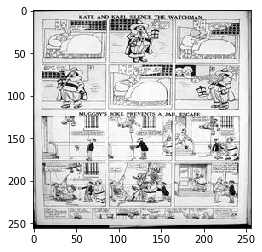

In [19]:
plt.imshow(data.val_ds.denorm(to_np(x))[0]) # denormalize and display image (* 1.2 to lighten)

In [28]:
sz = 64
bs = 16
data = get_data(sz, bs)

In [29]:
data = data.resize(int(sz * 1.3), 'tmp') # resize images for speed later

In [34]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

epoch      trn_loss   val_loss   <lambda>                  
    0      1.223671   8.281868   0.681046  



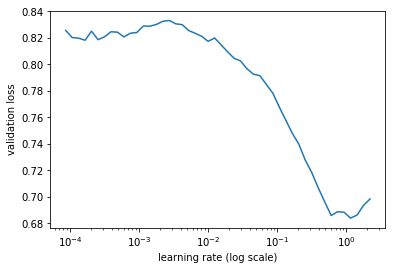

In [31]:
lrf = learn.lr_find()
learn.sched.plot()

In [32]:
lr = 0.2 # choose lr where loss is still clearly improving

In [140]:
learn.fit(lr, 2)

epoch      trn_loss   val_loss   <lambda>                  
    0      0.442508   0.394547   0.865359  
    1      0.399778   0.391424   0.883007                  


[array([0.39142]), 0.8830065359477124]

In [141]:
# learn.precompute=False
learn.fit(lr, 3, cycle_len=1)

epoch      trn_loss   val_loss   <lambda>                  
    0      0.295941   0.281764   0.888889  
    1      0.276026   0.287717   0.89281                   
    2      0.267631   0.301048   0.885621                  


[array([0.30105]), 0.8856209150326797]

In [142]:
# learn.precompute=False
lrs = [lr / 6, lr / 3, lr]
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   <lambda>                  
    0      0.301781   0.287919   0.894118  
    1      0.302009   0.288534   0.891503                  
    2      0.283708   0.272449   0.890196                  
    3      0.283408   0.29408    0.889542                  
    4      0.280602   0.277715   0.891503                  
    5      0.26696    0.267964   0.888889                  
    6      0.256655   0.266612   0.890196                  


[array([0.26661]), 0.8901960784313725]

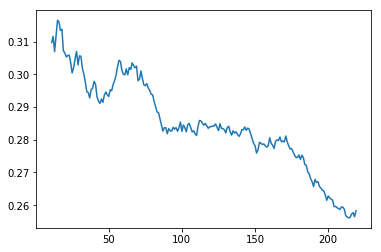

In [143]:
learn.sched.plot_loss()

In [144]:
learn.save('64')

In [36]:
# learn.load('64')

In [146]:
sz=128

# learn.precompute=False
learn.set_data(get_data(sz, bs))
learn.freeze()
learn.fit(lr, 3, cycle_len=1)

epoch      trn_loss   val_loss   <lambda>                  
    0      0.317387   0.292696   0.884314  
    1      0.29875    0.283259   0.884314                  
    2      0.291267   0.277798   0.881699                  


[array([0.2778]), 0.8816993464052287]

In [147]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   <lambda>                  
    0      0.317246   0.276897   0.881699  
    1      0.296125   0.287408   0.877124                  
    2      0.272386   0.242534   0.901307                  
    3      0.26629    0.260442   0.900654                  
    4      0.248202   0.28669    0.875163                  
    5      0.221559   0.243912   0.902614                  
    6      0.194869   0.242054   0.908497                  


[array([0.24205]), 0.9084967320261439]

In [148]:
learn.save('128')

In [38]:
# learn.unfreeze()
# learn.load('128')

In [39]:
sz=256

# learn.precompute=False
learn.set_data(get_data(sz, bs))
learn.freeze()
learn.fit(lr, 3, cycle_len=1)

epoch      trn_loss   val_loss   <lambda>                  
    0      0.275691   0.261045   0.89085   
    1      0.261039   0.255793   0.895425                  
    2      0.260975   0.252149   0.892157                  



[array([0.25215]), 0.8921568627450981]

In [42]:
lrs = [lr / 6, lr / 3, lr]
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   <lambda>                  
    0      0.259493   0.24075    0.899346  
    1      0.242662   0.222643   0.922876                  
    2      0.215283   0.204325   0.919608                  
    3      0.221877   0.242354   0.902614                  
    4      0.212753   0.238207   0.903268                  
    5      0.184048   0.206923   0.912418                  
    6      0.15404    0.204087   0.918954                  



[array([0.20409]), 0.9189542483660131]

In [43]:
learn.save('256')

In [44]:
def f2(preds, targs, start=0.17, end=0.24, step=0.01):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        return max([fbeta_score(targs, (preds>th), 2, average='samples')
                    for th in np.arange(start,end,step)])

In [ ]:
probs = learn.predict()
f2(probs, data.val_y)

In [ ]:
multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)

f2(preds,y)

### End